In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Customer_Category_Classifier_Dataset.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


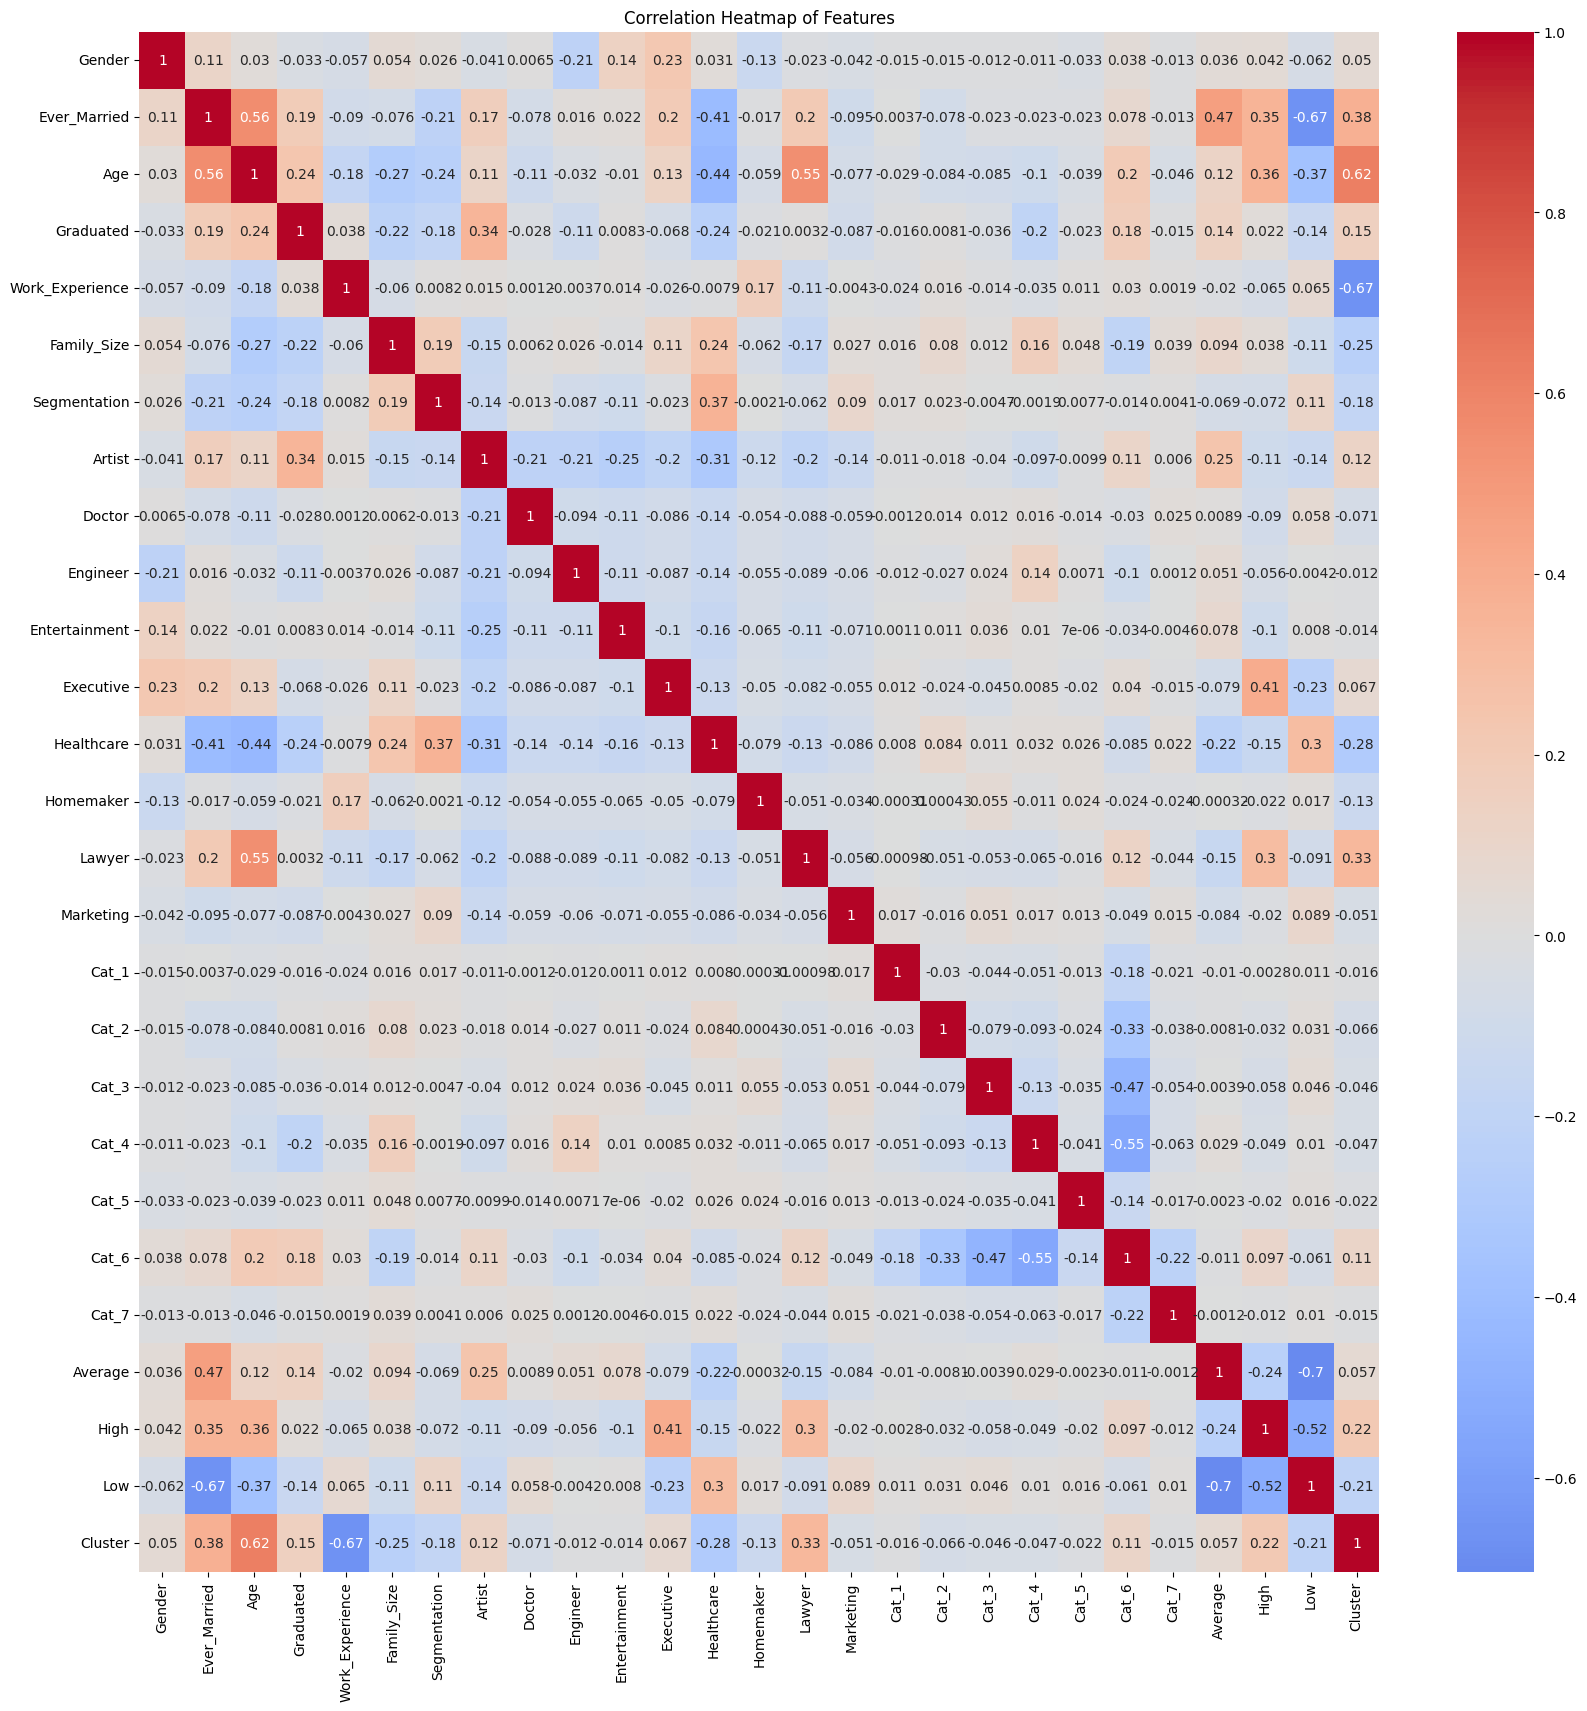

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=df.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="coolwarm",center=0)
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Artist,Doctor,Engineer,...,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Average,High,Low,Cluster
0,1,0,-1.284623,0,-0.451136,0.762698,3,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,0,1,-0.327151,1,-0.451136,0.095802,0,0,0,1,...,0,0,1,0,0,0,1,0,0,2
2,0,1,1.408268,1,-0.451136,-1.237990,1,0,0,1,...,0,0,0,0,1,0,0,0,1,3
3,1,1,1.408268,1,-0.757410,-0.571094,1,0,0,0,...,0,0,0,0,1,0,0,1,0,3
4,0,1,-0.207467,1,-0.451136,2.096491,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2


In [ ]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [ ]:
df=df.drop(columns=['ID'])

In [ ]:
#target= segmentation (A,B,C,D)
#classification problem , multiclass classification because (A,B,C,D)

In [ ]:
row , col = df.shape
print('row:', row)
print('col & features (including target):', col)
print('features (excluding target):', col-1)

row: 8068
col & features (including target): 10
features (excluding target): 9


In [ ]:
df.dtypes
#both quantitative & categorical

,0
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object
Segmentation,object


In [ ]:
df['Segmentation'].value_counts().sort_index()
#imbalance

,count
Segmentation,
A,1972
B,1858
C,1970
D,2268


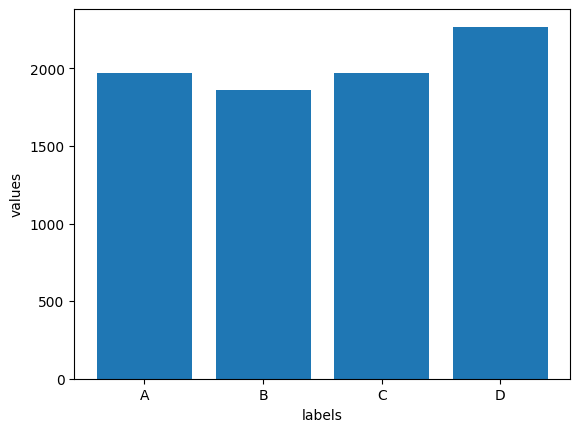

In [ ]:
labels=['A','B','C','D']
values=[1972,1858,1970,2268]

plt.bar(labels,values)
plt.xlabel("labels")
plt.ylabel("values")
plt.show()

#DATA PREPROCESSING

In [ ]:
df.isnull().sum() #total count of null values column-wise

,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76
Segmentation,0


In [ ]:
#Categorical Values
print(df['Ever_Married'].dtype)
print(df['Graduated'].dtype)
print(df['Profession'].dtype)
print(df['Var_1'].dtype)

object
object
object
object


In [ ]:
#Numeric Values
print(df['Work_Experience'].dtype)
print(df['Family_Size'].dtype)

float64
float64


In [ ]:
print('row wise data missing:',df.isnull().any(axis=1).sum()) #data missing row wise
print('column wise data missing:',df.isnull().any(axis=0).sum()) #data missing column wise
print('total length of the dataset:',len(df)) #total length of dataset

row wise data missing: 1403
column wise data missing: 6
total length of the dataset: 8068


In [ ]:
#median for numerical values
df['Work_Experience']=df['Work_Experience'].fillna(df['Work_Experience'].median())
df['Family_Size']=df['Family_Size'].fillna(df['Family_Size'].median())

In [ ]:
#mode for categorical values
df['Ever_Married']=df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])
df['Graduated']=df['Graduated'].fillna(df['Graduated'].mode()[0])
df['Profession']=df['Profession'].fillna(df['Profession'].mode()[0])
df['Var_1']=df['Var_1'].fillna(df['Var_1'].mode()[0])

In [ ]:
# null values are gone
df.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
df.head(30)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


#label encoding

In [ ]:
#Categorical Values
print(df['Ever_Married'].dtype)
print(df['Graduated'].dtype)
print(df['Profession'].dtype)
print(df['Var_1'].dtype)

object
object
object
object


In [ ]:
encoder = le()
df['Gender']=encoder.fit_transform(df['Gender'])
df['Ever_Married']=encoder.fit_transform(df['Ever_Married'])
df['Graduated']=encoder.fit_transform(df['Graduated'])
df['Segmentation']=encoder.fit_transform(df['Segmentation'])

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,3
1,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,0
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,1
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,1
4,0,1,40,1,Entertainment,1.0,High,6.0,Cat_6,0


In [ ]:
df.dtypes

,0
Gender,int64
Ever_Married,int64
Age,int64
Graduated,int64
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object
Segmentation,int64


In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,3
1,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,0
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,1
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,1
4,0,1,40,1,Entertainment,1.0,High,6.0,Cat_6,0


#One-Hot encoding

In [ ]:
profession_enc = pd.get_dummies(df['Profession'], dtype=int)
Var_1_enc = pd.get_dummies(df['Var_1'], dtype=int)
Spending_Score_enc = pd.get_dummies(df['Spending_Score'], dtype=int)
df = pd.concat([df.drop(['Profession','Var_1','Spending_Score'], axis=1),profession_enc, Var_1_enc, Spending_Score_enc], axis=1)

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Artist,Doctor,Engineer,...,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Average,High,Low
0,1,0,22,0,1.0,4.0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,38,1,1.0,3.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,1,67,1,1.0,1.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,1,1,67,1,0.0,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,40,1,1.0,6.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df.dtypes

,0
Gender,int64
Ever_Married,int64
Age,int64
Graduated,int64
Work_Experience,float64
Family_Size,float64
Segmentation,int64
Artist,int64
Doctor,int64
Engineer,int64


#Feature Scaling

In [ ]:
print(round(df.var(),2))

Gender               0.25
Ever_Married         0.24
Age                279.28
Graduated            0.23
Work_Experience     10.66
Family_Size          2.25
Segmentation         1.30
Artist               0.22
Doctor               0.08
Engineer             0.08
Entertainment        0.10
Executive            0.07
Healthcare           0.14
Homemaker            0.03
Lawyer               0.07
Marketing            0.03
Cat_1                0.02
Cat_2                0.05
Cat_3                0.09
Cat_4                0.12
Cat_5                0.01
Cat_6                0.22
Cat_7                0.02
Average              0.18
High                 0.13
Low                  0.24
dtype: float64


In [ ]:
scaler=ss()
df[['Age','Work_Experience','Family_Size']]=scaler.fit_transform(df[['Age','Work_Experience','Family_Size']])
print(round(df.var(),2))

Gender             0.25
Ever_Married       0.24
Age                1.00
Graduated          0.23
Work_Experience    1.00
Family_Size        1.00
Segmentation       1.30
Artist             0.22
Doctor             0.08
Engineer           0.08
Entertainment      0.10
Executive          0.07
Healthcare         0.14
Homemaker          0.03
Lawyer             0.07
Marketing          0.03
Cat_1              0.02
Cat_2              0.05
Cat_3              0.09
Cat_4              0.12
Cat_5              0.01
Cat_6              0.22
Cat_7              0.02
Average            0.18
High               0.13
Low                0.24
dtype: float64


#Data Splitting

In [ ]:
df['Segmentation'].value_counts().sort_index()

,count
Segmentation,
0,1972
1,1858
2,1970
3,2268


In [ ]:
X=df.drop('Segmentation',axis=1)
y=df['Segmentation']
# Stratified split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(6454, 25)
(1614, 25)
(1614,)
(6454,)


In [ ]:
models={"KNN": KNeighborsClassifier(n_neighbors=5),"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),"Neural Network": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)}
results={}
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  results[name]=acc
  print(f"\n{name} Accuracy: {acc:.4f}")
  print(classification_report(y_test, y_pred))


KNN Accuracy: 0.4796
              precision    recall  f1-score   support

           0       0.37      0.44      0.40       394
           1       0.35      0.33      0.34       372
           2       0.54      0.52      0.53       394
           3       0.65      0.60      0.63       454

    accuracy                           0.48      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.49      0.48      0.48      1614


Logistic Regression Accuracy: 0.5155
              precision    recall  f1-score   support

           0       0.41      0.43      0.42       394
           1       0.41      0.25      0.31       372
           2       0.51      0.59      0.55       394
           3       0.64      0.74      0.69       454

    accuracy                           0.52      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.52      0.50      1614


Neural Network Accuracy: 0.4981
              precision    recall  f1

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


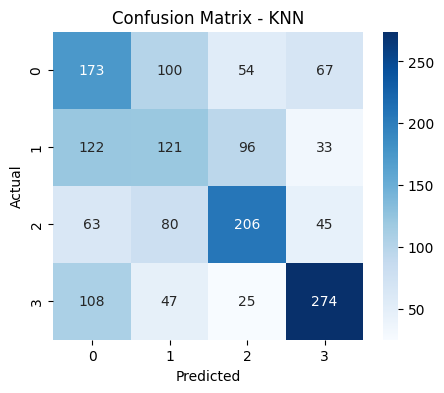

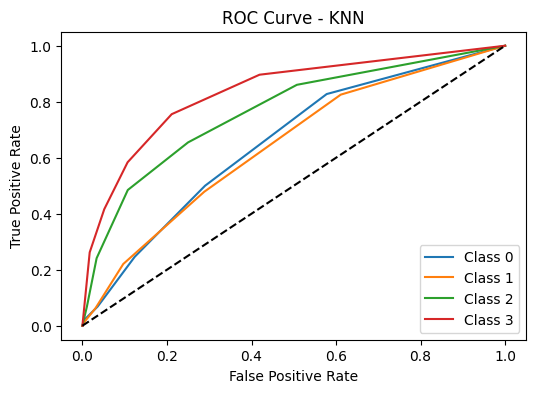

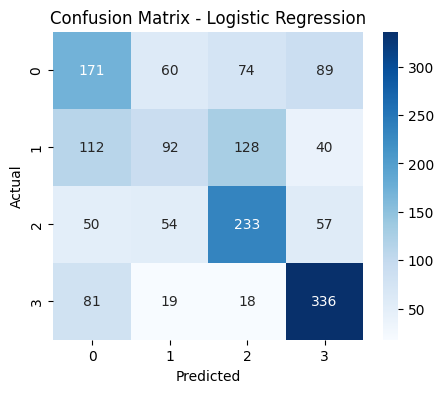

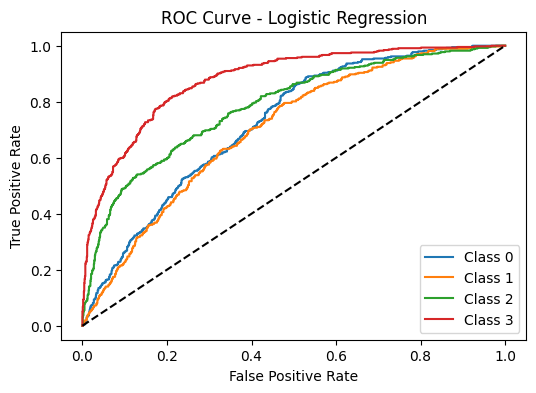

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


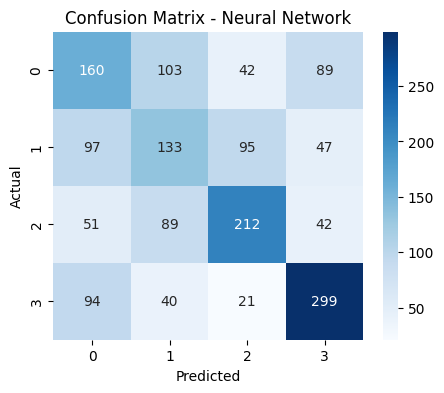

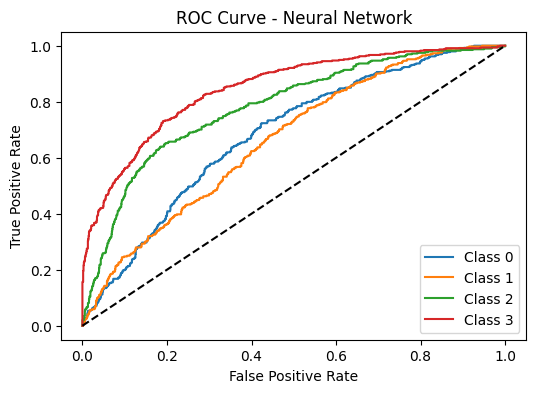

                 Model  Accuracy  Precision    Recall        F1       AUC
0                  KNN  0.479554   0.486699  0.479554  0.482026  0.723951
1  Logistic Regression  0.515489   0.501691  0.515489  0.502342  0.771689
2       Neural Network  0.498141   0.497336  0.498141  0.497477  0.743941


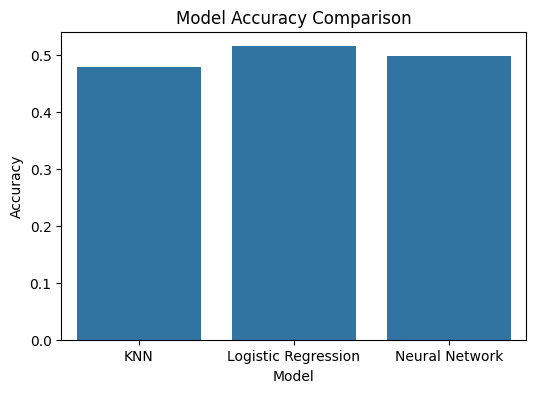

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,roc_curve)
from sklearn.preprocessing import label_binarize
metrics={"Model":[],"Accuracy":[],"Precision":[],"Recall":[],"F1":[],"AUC":[]}

# Classes
classes=sorted(y.unique())

for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  # Metrics
  acc=accuracy_score(y_test,y_pred)
  prec=precision_score(y_test,y_pred,average="weighted",zero_division=0)
  rec=recall_score(y_test,y_pred,average="weighted",zero_division=0)
  f1=f1_score(y_test,y_pred,average="weighted",zero_division=0)
  # ROC-AUC (one-vs-rest for multiclass)
  y_test_bin=label_binarize(y_test, classes=classes)
  y_pred_prob=model.predict_proba(X_test) if hasattr(model,"predict_proba") else None
  auc=roc_auc_score(y_test_bin,y_pred_prob,average="macro", multi_class="ovr") if y_pred_prob is not None else None

  metrics["Model"].append(name)
  metrics["Accuracy"].append(acc)
  metrics["Precision"].append(prec)
  metrics["Recall"].append(rec)
  metrics["F1"].append(f1)
  metrics["AUC"].append(auc)
  # Confusion Matrix
  cm=confusion_matrix(y_test,y_pred,labels=classes)
  plt.figure(figsize=(5,4))
  sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=classes,yticklabels=classes)
  plt.title(f"Confusion Matrix - {name}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
  #ROC Curve (only if predict_proba available)
  if y_pred_prob is not None:
    plt.figure(figsize=(6,4))
    for i, cls in enumerate(classes):
      fpr, tpr, _ = roc_curve(y_test_bin[:, i],y_pred_prob[:, i])
      plt.plot(fpr, tpr,label=f"Class {cls}")
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Final comparison DataFrame
results_df=pd.DataFrame(metrics)
print(results_df)
# Accuracy bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=results_df,x="Model",y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Only use input features (exclude target Segmentation)
X_unsupervised = df.drop("Segmentation", axis=1)

# Apply KMeans with 4 clusters (since target has 4 classes A,B,C,D)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_unsupervised)


In [ ]:
# Count customers in each cluster
print(df['Cluster'].value_counts())

# Compare clusters vs actual Segmentation
pd.crosstab(df['Cluster'], df['Segmentation'])


Cluster
3    2202
1    2191
2    2096
0    1579
Name: count, dtype: int64


Segmentation,0,1,2,3
Cluster,,,,
0,456,314,314,495
1,428,228,272,1263
2,385,662,879,170
3,703,654,505,340


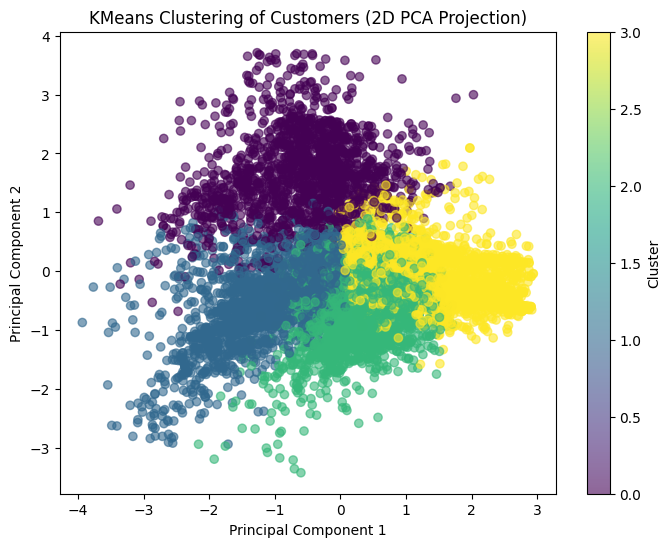

In [ ]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering of Customers (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_unsupervised, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.1710002654043663
